In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv("filtered.csv", parse_dates=["ISSUE_DATE"])
data_filtered = data[["ID","ISSUE_DATE","PERMIT#"]]
data_filtered.head(5)

#data_filtered.info()



,ID,ISSUE_DATE,PERMIT#
0,2015693,2010-06-14,100276612
1,2053303,2009-07-16,100293285
2,3125307,2020-11-10,100876352
3,3110706,2020-07-01,100864812
4,2068267,2009-08-31,100300715


In [32]:
df = data_filtered.groupby([data_filtered["ISSUE_DATE"].dt.year, data_filtered["ISSUE_DATE"].dt.month]).count()

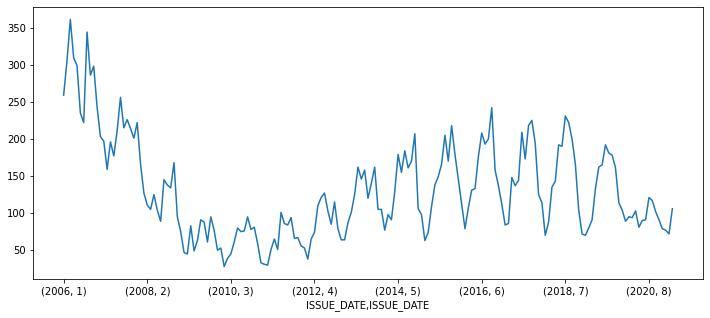

In [33]:
df['PERMIT#'].plot(figsize=(12,5))

df.to_csv(path_or_buf="new_permits_grouped.csv", header=True)

In [47]:
df.head(10)

ID  ISSUE_DATE  PERMIT#
ISSUE_DATE ISSUE_DATE                            
2006       1           259.0         259      259
           2           305.0         305      305
           3           361.0         361      361
           4           309.0         309      309
           5           299.0         299      299
           6           235.0         235      235
           7           222.0         222      222
           8           344.0         344      344
           9           286.0         286      286
           10          298.0         298      298

In [34]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [35]:
stepwise_fit = auto_arima(df["ID"], trace= True, suppress_warnings= True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1771.711, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2055.596, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1779.270, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1901.376, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2347.560, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1771.792, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1765.846, Time=0.67 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1779.363, Time=0.49 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=1768.914, Time=1.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1773.683, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  183
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -875.923
Date:                Wed, 21 Apr 2021   AIC                           1765.846
Time:                        13:25:16   BIC                           1788.313
Sample:                             0   HQIC                          1774.953
                                - 183                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.1311      9.764      1.447      0.148      -5.005      33.267
ar.L1          1.1824      0.067     17.593      0.000       1.051       1.314
ar.L2         -0.9278      0.109     -8.493      0.000      -1.142      -0.714
ar.L3          0.6240      0.083      7.541      0.000       0.462       0.786
ma.L1         -0.2593      0.032     -7.995      0.000      -0.323      -0.196
ma.L2          0.9668      0.038     25.760      0.000       0.893       1.040
sigma2       827.2079     70.024     11.813      0.000     689.964     964.452
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                26.02
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.36
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
train = df.iloc[:-40]
test= df.iloc[-40:]

#train.shape
test.shape

(40, 3)

In [37]:
df["ID"] = df["ID"].astype("float32") 
model = ARIMA(train["ID"], order=(3,0,2))
model = model.fit()
model.summary()


model2 = ARIMA(df["ID"], order=(3,0,2))
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     ID   No. Observations:                  183
Model:                     ARMA(3, 2)   Log Likelihood                -874.607
Method:                       css-mle   S.D. of innovations             28.481
Date:                Wed, 21 Apr 2021   AIC                           1763.213
Time:                        13:25:33   BIC                           1785.680
Sample:                             0   HQIC                          1772.320
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.2903     17.386      7.724      0.000     100.214     168.367
ar.L1.ID       1.1364      0.075     15.170      0.000       0.990       1.283
ar.L2.ID      -0.9100      0.098     -9.297      0.000      -1.102      -0.718
ar.L3.ID       0.5737      0.081      7.089      0.000       0.415       0.732
ma.L1.ID      -0.2604      0.030     -8.822      0.000      -0.318      -0.203
ma.L2.ID       0.9641      0.042     23.158      0.000       0.883       1.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1681           -0.0000j            1.1681           -0.0000
AR.2            0.2091           -1.2036j            1.2216           -0.2226
AR.3            0.2091           +1.2036j            1.2216            0.2226
MA.1            0.1350           -1.0094j            1.0184           -0.2288
MA.2            0.1350           +1.0094j            1.0184            0.2288
-----------------------------------------------------------------------------
"""

In [38]:
len(test)

40

In [39]:
start = len(train)
end = len(train)+len(test)-1

pred = model.predict(start = start, end  = end, typ = "levels")
pred.index = df.index[start:end+1]
print(pred)

ISSUE_DATE  ISSUE_DATE
2017        12            118.338485
2018        1              95.262313
            2             100.669435
            3             124.074641
            4             130.108470
            5             118.256059
            6             114.469601
            7             125.286848
            8             133.222250
            9             129.412273
            10            124.671198
            11            128.091445
            12            133.891470
2019        1             134.058039
            2             130.983769
            3             131.142494
            4             134.314638
            5             135.706203
            6             134.366968
            7             133.610210
            8             134.923432
            9             136.229928
            10            135.956799
            11            135.268397
            12            135.600680
2020        1             136.440484
            2  

In [45]:
start2 = 0
end2 = len(df)+23

index_future_dates = pd.date_range(start = "2006-01-01", end = "2023-03-01", freq="MS")

pred2 = model2.predict(start = start2, end  = end2, typ = "levels")
pred2.index = index_future_dates
print(pred2)

2006-01-01    134.290313
2006-02-01    244.867659
2006-03-01    285.956047
2006-04-01    339.922353
2006-05-01    294.406597
                 ...    
2022-11-01    133.066060
2022-12-01    133.409019
2023-01-01    133.471588
2023-02-01    133.459647
2023-03-01    133.585883
Freq: MS, Length: 207, dtype: float64


In [46]:
print(type(pred2))
pred2.to_csv(path_or_buf="future_permits_grouped.csv", header=True)
#pred2.plot(legend = True)
#df["ID"].plot(legend = True)

<class 'pandas.core.series.Series'>


In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(df['ID'].mean())

rmse=sqrt(mean_squared_error(pred2,df['ID']))
#print(rmse)

131.33333


ValueError: Found input variables with inconsistent numbers of samples: [207, 183]